# Safari Challenge

In this challenge, you must use what you've learned to train a convolutional neural network model that classifies images of animals you might find on a safari adventure.

## Explore the data

The training images you must use are in the **/safari/training** folder. Run the cell below to see an example of each image class, and note the shape of the images (which indicates the dimensions of the image and its color channels).

4 classes:
['elephant', 'giraffe', 'lion', 'zebra']


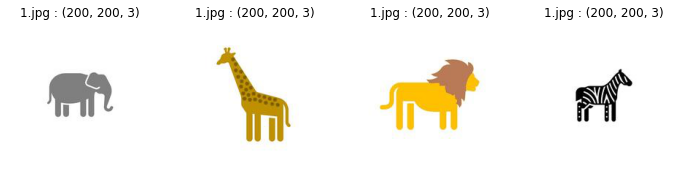

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/shapes folder
data_path = 'data/safari/training'

# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(12, 12))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(img_shape))
plt.show()

Now that you've seen the images, use your preferred framework (PyTorch or TensorFlow) to train a CNN classifier for them. Your goal is to train a classifier with a validation accuracy of 95% or higher.

Add cells as needed to create your solution.

> **Note**: There is no single "correct" solution. Sample solutions are provided in [05 - Safari CNN Solution (PyTorch).ipynb](05%20-%20Safari%20CNN%20Solution%20(PyTorch).ipynb) and [05 - Safari CNN Solution (TensorFlow).ipynb](05%20-%20Safari%20CNN%20Solution%20(TensorFlow).ipynb).

In [3]:
# Data Pre-processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# setting the image size
img_size = (128, 128)
batch_size = 30

# Setting normalization and training and validation set
datagen = ImageDataGenerator(rescale=1./255,
                            validation_split=0.3) # that means 30% of the data is left for validation purpose!

# Loading the training dataset from the directory
train_gen = datagen.flow_from_directory(data_path,
                                   target_size=img_size,
                                   batch_size=batch_size,
                                   class_mode='categorical',
                                   subset='training')
# loading the validation dataset from the directory
val_gen = datagen.flow_from_directory(data_path,
                                   target_size=img_size,
                                   batch_size=batch_size,
                                   class_mode='categorical',
                                   subset='validation')

classnames = list(train_gen.class_indices.keys())
classnames

Found 280 images belonging to 4 classes.
Found 116 images belonging to 4 classes.


['elephant', 'giraffe', 'lion', 'zebra']

In [6]:
# let's check the shapes of the training dataset
train_gen.image_shape
# that means 3 sample of the data with 128x128 pixels will enter the CNN Model

(128, 128, 3)

In [8]:
# Building the CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# we are going to work with sequential model
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters 
model.add(Conv2D(32, (6, 6), input_shape=train_gen.image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# We can add as many layers as we think necessary - here we'll add another convolution and max pooling layer
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# A dropout layer randomly drops some nodes to reduce inter-dependencies (which can cause over-fitting)
model.add(Dropout(0.2))

# Flatten the feature maps 
model.add(Flatten())

# Generate a fully-connected output layer with a predicted probability for each class
# (softmax ensures all probabilities sum to 1)
model.add(Dense(train_gen.num_classes, activation='softmax'))

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 32)      3488      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 32)        36896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 32)        36896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)       

In [11]:
# Train the model over 5 epochs and using the validation holdout dataset for validation
num_epochs = 5
history = model.fit(
    train_gen,
    steps_per_epoch = train_gen.samples // batch_size,
    validation_data = val_gen, 
    validation_steps = val_gen.samples // batch_size,
    epochs = num_epochs)

Epoch 1/5
9/9 [==============================] - 17s 2s/step - loss: 1.3095 - accuracy: 0.3583 - val_loss: 0.9090 - val_accuracy: 0.7333
Epoch 2/5
9/9 [==============================] - 14s 2s/step - loss: 0.7083 - accuracy: 0.7767 - val_loss: 0.1498 - val_accuracy: 0.9778
Epoch 3/5
9/9 [==============================] - 14s 2s/step - loss: 0.1613 - accuracy: 0.9447 - val_loss: 0.0535 - val_accuracy: 1.0000
Epoch 4/5
9/9 [==============================] - 13s 1s/step - loss: 0.0765 - accuracy: 0.9812 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 5/5
9/9 [==============================] - 13s 1s/step - loss: 0.0286 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000


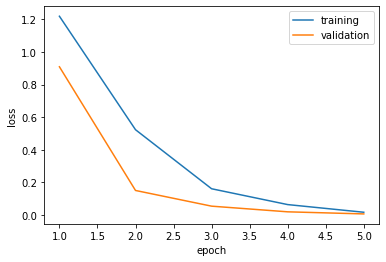

In [12]:
# let's view the loss throughout the training
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Generating predictions from validation data...


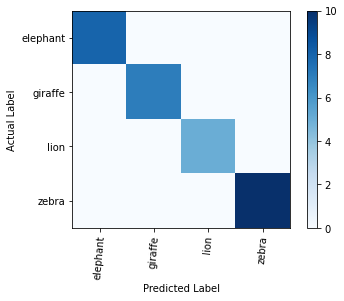

In [14]:
# Further Verification of model efficiency
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = val_gen[0][0]
y_test = val_gen[0][1]

# Use the model to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

## Save your model

Add code below to save your model's trained weights.

In [15]:
# Save the trained model
modelFileName = 'models/safari_classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/safari_classifier.h5
